In [22]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
np.random.seed(42)

In [80]:
x = 2 * np.random.rand(100,1) -1
y = 5*x**2 -.5*x + 2 + np.random.rand(100,1)

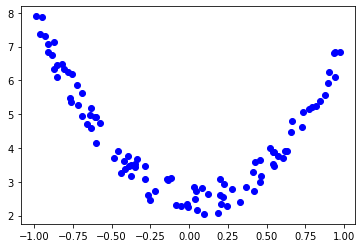

In [24]:
plt.plot(x,y, 'bo')

In [25]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt_reg = DecisionTreeRegressor()#max_depth = 3)

In [26]:
dt_reg.fit(x,y)

DecisionTreeRegressor()

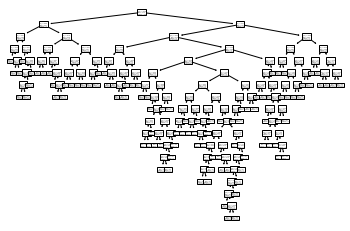

In [27]:
plot_tree(dt_reg)
plt.show()

In [28]:
x_test = np.linspace(-1,1,75).reshape(-1,1)

In [29]:
y_pred = dt_reg.predict(x_test)

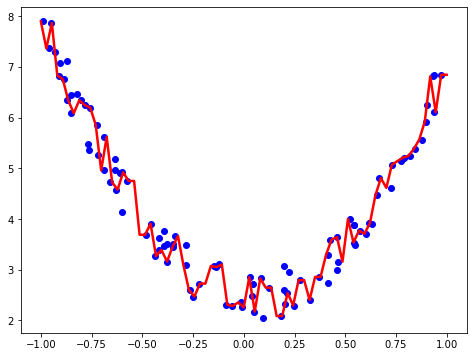

In [30]:
plt.figure(figsize=(8,6))
plt.plot(x,y, 'bo')
plt.plot(x_test,y_pred,'r-',lw =2.5)
plt.show()

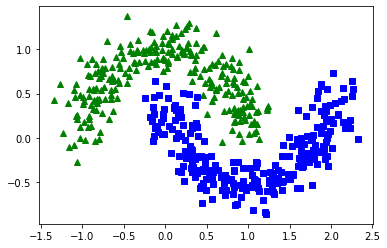

In [112]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples = 500, noise = 0.15, random_state= 42)
plt.plot(x[:,0][y==0], x[:,1][y==0],'g^')
plt.plot(x[:,0][y==1], x[:,1][y==1],'bs')
plt.show()

In [113]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [144]:
log_clf = LogisticRegression()
lin_svc = LinearSVC()
dt_clf = DecisionTreeClassifier() # max_depth= 3)
rf_clf = RandomForestClassifier(max_depth= 3)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('linear_svc', lin_svc),('decision_tree',dt_clf),('randon_clf', rf_clf)], voting = 'hard')

In [135]:
voting_clf.fit(x,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('linear_svc', LinearSVC()),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=3)),
                             ('randon_clf',
                              RandomForestClassifier(max_depth=3))])

In [116]:
y_pred = voting_clf.predict(x)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y,y_pred)

0.91

In [119]:
rf_clf.fit(x,y)
y_pred_rf = rf_clf.predict(x)

In [120]:
accuracy_score(y, rf_clf.predict(x))

0.916

In [121]:
log_clf.fit(x,y)
y_pred_log = log_clf.predict(x)
accuracy_score(y,y_pred_log)

0.86

In [122]:
def accuracy_score_(est):
    est.fit(x,y)
    y_pred_ = est.predict(x)
    score = accuracy_score(y,y_pred_)
    print(f'{est.__class__.__name__} accuracy =', score)

In [123]:
for i in (log_clf, lin_svc, dt_clf, rf_clf, voting_clf ):
    accuracy_score_(i)

LogisticRegression accuracy = 0.86
LinearSVC accuracy = 0.864
DecisionTreeClassifier accuracy = 0.924
RandomForestClassifier accuracy = 0.92
VotingClassifier accuracy = 0.912


In [124]:
from sklearn.ensemble import BaggingClassifier

In [153]:
bag_clf = BaggingClassifier(dt_clf,n_estimators=500, bootstrap= True, random_state= 42,)

In [154]:
bag_clf.fit(x,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=42)

In [157]:
dt_clf.fit(x,y)

DecisionTreeClassifier()

In [159]:
def plot_decision_bundry(clf, x,y, axes = [-1.5,2.5,-1.5,1.5], alpha = 0.5):
    x1_test = np.linspace(axes[0],axes[1],100)
    x2_test = np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1_test,x2_test)
    x_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred, alpha = 0.3,lw = 10)
    plt.plot(x[:,0][y==0], x[:,1][y==0],'g^')
    plt.plot(x[:,0][y==1], x[:,1][y==1],'bs')
    plt.axis(axes)

<ipython-input-159-b5ed98fd26be>:7: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contourf(x1,x2,y_pred, alpha = 0.3,lw = 10)
<ipython-input-159-b5ed98fd26be>:7: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contourf(x1,x2,y_pred, alpha = 0.3,lw = 10)


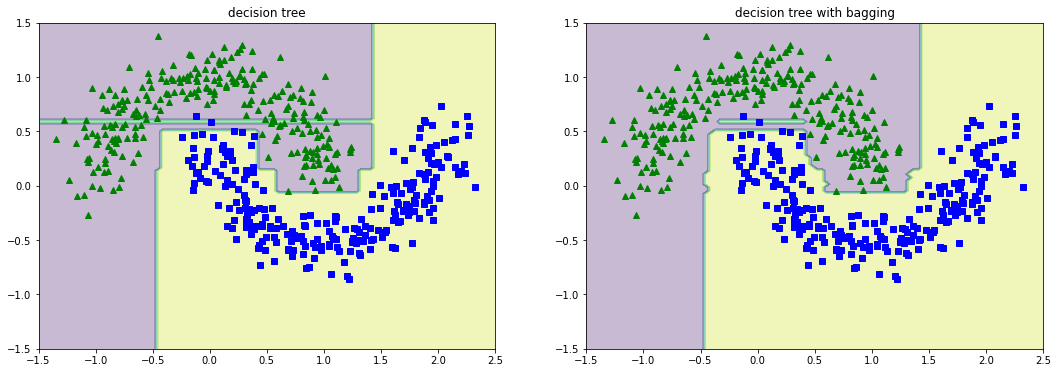

In [160]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plot_decision_bundry(dt_clf,x,y)
plt.title('decision tree')

plt.subplot(1,2,2)
plot_decision_bundry(bag_clf,x,y)
plt.title('decision tree with bagging')
plt.show()